# 9.1.3 - Import Dependencies

Matplotlib Dependencies
The first dependency we will need to import is Matplotlib, as we'll need to graph the results of our analysis to show investors.

Matplotlib's dependency contains code that allows you to plot data. There are many different kinds of plots you can create; for this project, we'll use the "fivethirtyeight" style. This style essentially tries to replicate the style of the graphs from FiveThirtyEight.com. (There are other style types too—if a different style catches your eye, feel free to use it!)

NOTE
For more information about fivethirtyeight style, see this [FiveThirtyEight style sheet](https://matplotlib.org/stable/gallery/style_sheets/fivethirtyeight.html). 

Start by running the following code. This will import style from Matplotlib.

In [1]:
%matplotlib inline

# Start by running the following code. This will import style from Matplotlib.
from matplotlib import style

# Next, we'll add the specific style we want, fivethirtyeight. Add this line to your code:
style.use('fivethirtyeight')

# Now we need to add the pyplot module, a dependency that provides us with a MATLAB-like plotting framework. Go ahead and add this to your code.
import matplotlib.pyplot as plt


## NumPy and Pandas Dependencies
We will need to use a few standard dependencies for our code.

In [2]:
import numpy as np
import pandas as pd

## Datetime Dependencies
We'll use datetime in this module because we'll need to calculate some data points that have to do with dates.

In [3]:
# To import datetime, run the following code:

import datetime as dt

# Import SQLAlchemy Dependencies

We know we want to query a SQLite database, and SQLAlchemy is the best tool to do that. So we'll need to import dependencies from SQLAlchemy.

We can start by adding the SQLAlchemy dependency, but then we will also add the dependencies for `automap`, `session`, `create_engine`, and `func`. These dependencies will help us set up a simple database that we'll use later on.

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# 9.1.4 - Getting Started with SQLite

SQLite provides a quick way to setup a database engine without requiring a server. It's essentially a flat file, but with most of the major capabilities of an SQL database—just like how a "lite" version of ice cream is basically ice cream, but with less fat.

You can compare SQLite databases to a CSV or Excel file: each SQLite database can have one or more tables with columns and rows, and it is stored as a file on your computer. The key difference between SQLite databases and a CSV or Excel file is that we can write queries for it.

## SQLite Advantages
While there are a few specific use cases for SQLite, we'll be focusing on how it can be beneficial to you and where you might get the most value from it. The main advantages are:

It's local. One of the core advantages of SQLite is that it allows you to create databases locally on your computer to support testing and easy prototyping. This is beneficial, because if you want to test something out and you need a database, it's not always the most convenient to set up a SQL database server just to try something out.
There's an app for that. Another advantage of SQLite databases are that they can be used on a mobile phone app. Most mobile phone games will use an SQLite database to store certain information about you or your players statistics. While we won't be creating a mobile app in this module, it's still helpful to understand the full context.

## SQLite Disadvantages
SQLite also has a couple of disadvantages, however. They are:

It's local. If you've used a MYSQL database before, you might have noticed that you can have multiple users access the database. With SQLite, there are no users. SQL is local: stored on one computer or phone. So, only that computer or phone will have access.
There are fewer security features: one other disadvantage to be aware of is that SQLite doesn't have as many security features as a traditional SQL database. While it's not something specifically to be concerned with for this module, just keep that in mind as you create other databases later on.
Good work with SQLite! Now let's move on to SQLAlchemy.

# 9.1.5 - Getting Started with SQLAlchemy

SQLAlchemy is one of the primary technologies we will be looking at in this module. It's extremely helpful for querying databases. If you are familiar with PostgreSQL, you'll see there are many similarities to the process. Watch the following video to learn more about SQLAlchemy. 

## SQLAlchemy ORM
One of the primary features of SQLAlchemy is the Object Relational Mapper, which is commonly referred to as ORM. ORM allows you to create classes in your code that can be mapped to specific tables in a given database. This allows us to create a special type of system called a decoupled system.

To understand ORMs and decoupled systems, consider the following scenario. Suppose you are cleaning out the garage, and you find a bunch of wires or ropes that are all knotted together. We would call this a tightly coupled system: all of the different ropes are connected to each other, so if we go to grab just one, the whole mess comes along with it. What the ORM does for us is untangle—or decouple—all of those ropes, so we can use just one of them at a time. When we pick one up, we won't pick up the whole knot; or, if one element breaks, it doesn't affect any of the other cords.

Generally speaking, the less coupling in our code, the better. If there are a bunch of relationships between all of your coding components and one of them breaks, everything breaks.

The ORM helps us keep our systems decoupled. We'll get into more specific details about how we can keep our code decoupled, but for now, just remember that your references will be to classes in your code instead of specific tables in the database, and that we'll be able to influence each class independently.

***

## SQLAlchemy Create Engine
Another really great feature of SQLAlchemy is the `create engine` function. This function's primary purpose is to set up the ability to query a SQLite database. After all, data just sitting in a database that we can't access does us no good.

In order to connect to our SQLite database, we need to use the `create_engine()` function. This function doesn't actually connect to our database; it just prepares the database file to be connected to later on.

This function will typically have one parameter, which is the location of the SQLite database file. 

In [5]:
# Try this function by adding the following line to your code:

engine = create_engine("sqlite:///hawaii.sqlite")


We've got our engine created—good work! Next we're going to reflect our existing database into a new model with the automap_base() function. Reflecting a database into a new model essentially means to transfer the contents of the database into a different structure of data. 

## SQLAlchemy Automap Base
Automap Base creates a base class for an automap schema in SQLAlchemy. Basically, it sets up a foundation for us to build on in SQLAlchemy, and by adding it to our code, it will help the rest of our code to function properly.


In [6]:
# In order for your code to function properly, you will need to add this line to your code:

Base = automap_base()


Good work! You don't need to run your code quite yet—we'll do that in the next section. Let's move onto reflecting our database tables into our code.

***

## SQLAlchemy Reflect Tables

Now that we've gotten our environment set up for SQLAlchemy, we can reflect our tables with the prepare() function. By adding this code, we'll reflect the schema of our SQLite tables into our code and create mappings.

#### `MPORTANT`
Remember when we talked about keeping our code decoupled? When we reflect tables, we create classes that help keep our code separate. This ensures that our code is separated such that if other classes or systems want to interact with it, they can interact with only specific subsets of data instead of the whole dataset.


In [7]:
# Add the following code to reflect the schema from the tables to our code:

Base.prepare(engine, reflect=True)


Now that we've reflected our database tables, we can check out the classes we'll be creating with Automap.

## View Classes Found by Automap
Once we have added the `base.prepare()` function, we should confirm that the Automap was able to find all of the data in the SQLite database. We will double-check this by using `Base.classes.keys()`. This code references the classes that were mapped in each table.

* `Base.classes` gives us access to all the classes.
* `keys()` references all the names of the classes.

#### `IMPORTANT`
Previously, we talked about decoupled systems in the SQLAlchemy ORM. This directly relates to the classes we have created here. These classes help keep our data separate, or decoupled. Keep in mind that our data is no longer stored in tables, but rather in classes. The code we will run below enables us to essentially copy, or reflect, our data into different classes instead of database tables.

Run the following code:

In [8]:
Base.classes.keys()


['measurement', 'station']

***
### Quiz

What is the outcome of the code after you run Base.classes.keys()?

~[‘precipitation’,’station]~

~[‘station’]~

~[‘measurement’]~

**[‘measurement’,’station’]**

Correct. Nice work! These are the correct keys.
***

Now that we've viewed all of our classes, we can create references to each table.
***

## Save References to Each Table
In order to reference a specific class, we use `Base.classes.<class name>`. For example, if we wanted to reference the station class, we would use `Base.classes.station`.

Since it can be rather cumbersome to type `Base.classes` every time we want to reference the measurement or station classes, we can give the classes new variable names. In this case, we will create new references for our `Measurement` class and `Station` class. Add these new variables to your code:


In [9]:
# Assign variables to classes for ease of reference

Measurement = Base.classes.measurement
Station = Base.classes.station


Now that we have our references saved to some new variables, let's work on creating a session link to our database.
***

## Create Session Link to the Database

Let's create a session link to our database with our code. First, we'll use an SQLAlchemy Session to query our database. Our session essentially allows us to query for data.

In [10]:
# Create a session link
session = Session(engine)


# 9.2.1 - Retrieve the Precipitation Data

In the weather database, let's calculate the date one year from August 23, 2017. We'll be creating a variable called `prev_year` and using the datetime dependency that we imported previously.

The datetime dependency has a function called `dt.date()`, which specifies the date in the following format: year, month, day.


## Find the Date One Year Ago
Add the most recent date, August 23, 2017, with the following code:

`prev_year = dt.date(2017, 8, 23)`

This code specifies the most recent date, but we want to calculate the date one year back. To do this, add the dt.timedelta() function to the previous line of code. This function allows us to trace back a certain number of days. In this case, we want to go back 365 days. Go ahead and add the dt.timedelta() function to your code.


`prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)`

Now that we've got our date from the previous year (August 23, 2016), let's retrieve the amount of precipitation that was recorded, or the precipitation score.

In [11]:
prev_year = dt.date(2017, 8, 23)


In [12]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_year

datetime.date(2016, 8, 23)

## Retrieve the Precipitation Scores
We'll begin by creating a variable to store the results of the query we'll write. This variable will be called results:

`results = []`

This code defines our new variable. Next, let's add our session that we created earlier so that we can query our database. For this we'll use the `session.query()` function, which is how we'll begin all of our queries in SQLAlchemy. **From a bird's-eye view, this is how we query a SQLite database using Python.**

The `session.query()` function for this query will take two parameters. We will reference the Measurement table using `Measurement.date` and `Measurement.prcp`. Add the following to your code:

`results = session.query(Measurement.date, Measurement.prcp)`

Let's give this a shot and run the code. You might notice that there isn't anything returned. Let's go ahead and add a new line here. This will print everything that is returned in the query.

`print(results.all())`

In [13]:
results = []

In [14]:
results = session.query(Measurement.date, Measurement.prcp)
print(results.all())


[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

***
We still have a few aspects to add to our query, but we'll get to that shortly.

Since we only want to see the most recent data, we need to filter out all of the data that is older than a year from the last record date. We'll use the `filter()` function to filter out the data we don't need. Add the `filter()` function to the existing query.

`results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)`

One last thing: we'll add a function that extracts all of the results from our query and put them in a list. To do this, add `.all()` to the end of our existing query. All said and done, your query should look something like this:

`results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()`

Let's run this code. We'll print the results in order to ensure that we're getting output. Add `print(results)` after the last line of code. 

In [15]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

In [16]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)


[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

#### `IMPORTANT`

When you're handling a data analysis problem, printing your results is one of the most important tasks you can do. This can help you debug your code and ensure that you're getting all the data that you are expecting.

You should print your results frequently so that you can make sure you're getting the data that you expect. Otherwise, you might spend hours working on code only to discover you're way off track.

***

Good work! Now that we've created the query, let's save it so that we can easily access it later, when we dive into Flask. Let's walk through how to do that now.

# 9.2.2 - Save Query Results

We have our weather results saved in a variable. In order to access it in the future, we'll save it to a Python Pandas DataFrame. We'll start by creating a DataFrame variable, `df`, which we can use to save our query results.

In order to save our results as a DataFrame, we need to provide our results variable as one parameter and specify the column names as our second parameter. To do this, we'll add the following line to our code:

`df = pd.DataFrame(results, columns=['date','precipitation'])`

This saves our query results in two columns, `date` and `precipitation`. Now we can manipulate the results however we would like. There are many functions you can use to manipulate how DataFrames look, but we'll start with using the `set_index()` function.

In [17]:
df = pd.DataFrame(results, columns=['date','precipitation'])
df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


## Use the set_index() Function

The set_index() function can be a little tricky, but let's jump in. For example, let's say our DataFrame looks something like below. Note that our data will not look like this exactly—this is just an example.

```
   date        precipitation
0   08/23/2017  1
1   08/22/2017  2
2   08/21/2017  1
3   08/20/2017  1
```

The first column is auto-generated and contains the row number. However, we want the index column to be the date column, so we'll need to get rid of those row numbers.

To do this, set the index to the date column. This will make the date column the first column.

For this project, we're going to experiment and write over our original DataFrame. By doing this, we can reduce the complexity of our code and use fewer variables.

***
#### `REWIND`
We can use the variable inplace to specify whether or not we want to create a new DataFrame.
***

Let's go ahead and use the same DataFrame. By setting inplace=True, we're saying that we do not want to create a new DataFrame with the modified specifications. If we set it to "False," then we would create a new DataFrame. Add the following to your code:

`df.set_index(df['date'], inplace=True)`

Run the code. Then print the DataFrame with and without the index so that you can see the difference.



In [18]:
df.set_index(df['date'], inplace=True)

## Print the DataFrame With and Without the Index

To print a DataFrame with the index, use the following code:

`print(df)`

Here's what the printed DataFrame with the index should look like:

In [19]:
print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


***
Great work! Our DataFrame looks good. However, because we are using the date as the index, the DataFrame has two date columns, which is confusing. So we'll print the DataFrame without the index so we can see just the date and precipitation.

For this task, we'll need to use a slightly different print statement. First we'll convert the DataFrame to strings, and then we'll set our index to "False." This will allow us to print the DataFrame without the index. Add the following to your code:

`print(df.to_string(index=False))`

When you run the code, your results should look like the image below. Note that this image shows only the first several lines—your results will likely be longer.



In [20]:
print(df.to_string(index=False))


      date  precipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12           0.00
2016-09-13           0.02
2016-09-14           1.32
2016-09-15           0.42
2016-09-16           0.06
2016-09-17           0.05
2016-09-18           0.00
2016-09-19           0.00
2016-09-20           0.00
2016-09-21           0.00
2016-09-22           0.02
2016-09-23           0.00
2016-09-24           0.00
2016-09-25           0.00
2016-09-26           0.06
2016-09-27           0.02
2016-09-28           0.00
2016-09-29  

Good work! Now that our DataFrame is set up, we can sort the results within the DataFrame. If you scroll through the data, you may notice that many dates are not in chronological order. Our next order of business is to fix that.

# 9.2.3 - Sort the DataFrame

In [21]:
df = df.sort_index()


*** 

#### Quiz

What code would you run to print the sorted list without the index?

~print(df.to_string)~

**print(df.to_string(index=False)**

~print(df)~

~print(df.to_string(index=True)~

Correct. Nice work! Use this code to print the sorted list without the index.

***

In [22]:
print(df.to_string(index=False))


      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

All of the dates are now in order, which is exactly what we were hoping to accomplish. Scroll through the results to make sure.
```
NOTE
It's critical to keep your brain checked-in while you are writing code and solving problems. Otherwise, simple errors may slip past you!
```

Good work sorting the DataFrame. Now you can plot the results to really impress W. Avy!

# 9.2.4 - Plot the Data

Remember, your goal is to provide W. Avy with insight into the weather patterns of a specific location on Oahu where you would like to build your shop. One way to provide this insight is with a visualization—we'll plot the results of our precipitation analysis using Matplotlib.

```
REWIND
We've covered plotting before, using Matplotlib. We'll be using Matplotlib for this project as well. Plotting is essentially displaying your data in a visual way. There are many different types of plots, but we'll use a select few for this analysis.
```

Since our DataFrame is represented as the variable df, we can use the df.plot() function. Type the following code:

`df.plot()`

Run this code.

<AxesSubplot:xlabel='date'>

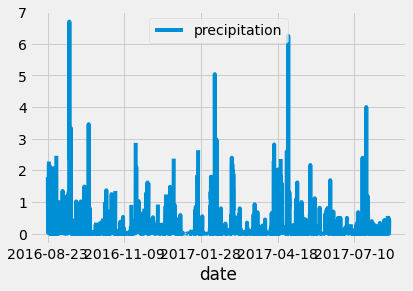

In [23]:
df.plot()

Along the x-axis are the dates from our dataset, and the y-axis is the total amount of precipitation for each day. While this data shows all of the station observations, we are interested in determining weather trends. One trend we can observe based on this plot is that some months have higher amounts of precipitation than others. Awesome—this observation confirms that the plot is useful. W. Avy is going to love it!

Next, we want to create a summary of a few statistics, and then we can send W. Avy an email with our initial findings. Be sure to tell W. Avy that this plot shows the total precipitation per day.

# 9.2.5 - Generate the Summary

We're getting close to being able to deliver some of our findings to W. Avy.

***
#### `REWIND`
Here's a refresher on some key concepts in statistics:

**Mean**: the average, which you can find by adding up all the numbers in a dataset and dividing by the number of numbers.

**Variance**: how far a set of numbers is from the average.

**Standard** deviation: a measure of how spread out the numbers in a dataset are; the square root of the variance.

**Minimum**: the smallest number in a dataset.

**Maximum**: the largest number in a dataset.

**Percentiles**: where the number is in relation to the rest of the set of data.

**Count**: the total number of numbers or items in a dataset.
***

Fortunately, Pandas helps us with these calculations. We'll use the describe() function to calculate the mean, minimum, maximum, standard deviation, and percentiles. Add the following to your code:

`df.describe()`

Now run everything you've got so far. The summary should look something like this:



In [24]:
df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


This data gives us a summary of different statistics for the amount of precipitation in a year. The count is the number of times precipitation was observed. The other statistics are the precipitation amounts for each station for each day.

**ADD/COMMIT/PUSH** 
You've accomplished a lot so far! Now is a good time to update or add your code to your GitHub repository.

Now that we've completed our precipitation analysis, we can share it with W. Avy and move on to the station analysis.


# 9.3.1 - Find the Number of Stations

We need to write a query to get the number of stations in our dataset. We'll use our session that we created earlier to query our database.

Begin by adding the starting point for our query, which is the following line:

`session.query()`

Continuing with our query, we'll use `func.count`, which essentially counts a given dataset we are interested in. In this case, we want to count the total number of stations. We can do this by referencing `Station.station`, which will give us the number of stations. Add the query parameters to your code, like this:

`session.query(func.count(Station.station))`

Now we need to add the `.all()` function to the end of this query so that our results are returned as a list. Your final query should look like the following:

`session.query(func.count(Station.station)).all()`


In [25]:
session.query()


In [26]:
session.query(func.count(Station.station))


In [27]:
session.query(func.count(Station.station)).all()


[(9,)]

***
#### Quiz

How many stations did your query return?

~8~

~21~

**9**

~14~

Correct. Nice work! 
***

Now we know there are 9 stations from which precipitation data is being collected. However, in order to truly answer W. Avy's question, we don't just need to know the number of stations; we need to know how active the stations are as well. That is, we want to figure out which stations tend to have the most precipitation recordings. Let's figure that out next.

# 9.3.2 - Determine the Most Active Stations

Now that we've found the total number of stations, we need to run a query to determine the most active stations. This query is a bit more complicated, but with your solid understanding of queries, you'll be able to master it!

Begin with the function we use to start every query in SQLAlchemy:

`session.query()`
Next, we need to add a few parameters to our query. We'll list the stations and the counts, like this:

`session.query(Measurement.station, func.count(Measurement.station))`

Now that we have our core query figured out, let's add a few filters to narrow down the data to show only what we need.



In [28]:
session.query()


In [29]:
session.query(Measurement.station, func.count(Measurement.station))

In [30]:
session.query(Measurement.station, func.count(Measurement.station))

***
We want to group the data by the station name, and then order by the count for each station in descending order. We're going to add `group_by()` first.

```
REWIND
You have previously used the groupby() function. The group_by() function for SQLite follows the same idea and groups data similarly.
```

Here's what your code should look like:

`session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station)`
    
Now let's add the order_by function. This function will order our results in the order that we specify, in this case, descending order. Our query results will be returned as a list.

After the code above, add `order_by(func.count(Measurement.station).desc())`, as shown below.

`session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc())`

Now we need to add the .all() function here as well. This will return all of the results of our query. This is what your query should look like:

`session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()`

Good work! Run this query


In [31]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station)


In [32]:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc())


In [33]:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In the left column is the station ID, and on the right are the counts for each station. The counts indicate which stations are most active. We can also see which stations are the least active.

Great work! This was a complicated SQLAlchemy query, so you should feel accomplished.
***


# 9.3.3 - Find Low, High, and Average Temperatures

Let's get to work on our temperature analysis! We'll be using the results from our last query, which gave us the most active station, to gather some basic statistics. For our most active station, we'll need to find the minimum, maximum, and average temperatures.

Like our previous queries, we'll begin with this line of code:

`session.query()`

Next, we will calculate the minimum, maximum, and average temperatures with the following functions: `func.min`, `func.max`, and `func.avg`. Add these functions to your query, like this:

`session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))`

With the minimum, maximum, and average in our query, we now need to add one filter. We'll be filtering out everything but the station W. Avy is interested in. If you look at the outcome of the previous query, you can see that the most active station is USC00519281. Therefore, we will need to add this station ID to our filter below.

`session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281')`

Finally, add the .all() function to return our results as a list. Here's what your final query should look like:

`session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()`

Go ahead and run the query. Your results should look like the following:

[(54.0, 85.0, 71.66378066378067)]

The results show that the low (minimum) temperature is 54 degrees, the high (maximum) temperature is 85 degrees, and the average temperature is approximately 71.7 degrees.

We have the minimum, maximum, and average temperatures for our station—great work! W. Avy has asked for us to share the results, so let's go above and beyond and create a visualization for him. Visualizing our data will allow us—and W. Avy—to notice trends, as well as draw more accurate conclusions from it. Let's plot our data!
***

In [34]:
session.query()


In [35]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))


In [36]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281')


In [37]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

***
# 9.3.4 - Plot the Highest Number of Observations

We need to create a plot that shows all of the temperatures in a given year for the station with the highest number of temperature observations.

## Create a Query for the Temperature Observations

To create a query, first select the column we are interested in. We want to pull `Measurement.tobs` in order to get our total observations count. Add this to your code:

`session.query(Measurement.tobs)`

Now filter out all the stations except the most active station with filter `(Measurement.station == 'USC00519281')`. Your code should look like this:

`results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281')`

We need to apply another filter to consider only the most recent year. For this we can reuse some of the code we have written previously. Then we'll add the .all() function to save our results as a list. Here's what your query should look like:

`results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()`

To run this code, you will need to add a print statement around it.

`print(results)`

Your query results should look like the following.

In [38]:
session.query(Measurement.tobs)


In [39]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281')


In [40]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()


In [41]:
print(results)


[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

***
### Quiz

Which of the following is the best way to make the data easier to read?

**Put it into a DataFrame.**

~Create a string.~

~Put it into a list.~

Correct. Nice work! 
***

## Convert the Temperature Observation Results to a DataFrame

```
REWIND
When creating a DataFrame, our first parameter is our list, and the second parameter is the column(s) we want to put our data in. In this case, we want to put our temperature observations result list into a DataFrame.
```

To convert the results to a DataFrame, add the following to your code:

`df = pd.DataFrame(results, columns=['tobs'])`

Add a `print(df)` statement after the last line and run the code. Below is what your data should now look like. Feel free to remove the index column.


In [42]:
df = pd.DataFrame(results, columns=['tobs'])
# print(df)
print(df.to_string(index=False))


 tobs
 77.0
 77.0
 80.0
 80.0
 75.0
 73.0
 78.0
 77.0
 78.0
 80.0
 80.0
 78.0
 78.0
 78.0
 73.0
 74.0
 80.0
 79.0
 77.0
 80.0
 76.0
 79.0
 75.0
 79.0
 78.0
 79.0
 78.0
 78.0
 76.0
 74.0
 77.0
 78.0
 79.0
 79.0
 77.0
 80.0
 78.0
 78.0
 78.0
 77.0
 79.0
 79.0
 79.0
 79.0
 75.0
 76.0
 73.0
 72.0
 71.0
 77.0
 79.0
 78.0
 79.0
 77.0
 79.0
 77.0
 78.0
 78.0
 78.0
 78.0
 77.0
 74.0
 75.0
 76.0
 73.0
 76.0
 74.0
 77.0
 76.0
 76.0
 74.0
 75.0
 75.0
 75.0
 75.0
 71.0
 63.0
 70.0
 68.0
 67.0
 77.0
 74.0
 77.0
 76.0
 76.0
 75.0
 76.0
 75.0
 73.0
 75.0
 73.0
 75.0
 74.0
 75.0
 74.0
 75.0
 73.0
 75.0
 73.0
 73.0
 74.0
 70.0
 72.0
 70.0
 67.0
 67.0
 69.0
 70.0
 68.0
 69.0
 69.0
 66.0
 65.0
 68.0
 62.0
 75.0
 70.0
 69.0
 76.0
 76.0
 74.0
 73.0
 71.0
 74.0
 74.0
 72.0
 71.0
 72.0
 74.0
 69.0
 67.0
 72.0
 70.0
 64.0
 63.0
 63.0
 62.0
 70.0
 70.0
 62.0
 62.0
 63.0
 65.0
 69.0
 77.0
 70.0
 74.0
 69.0
 72.0
 71.0
 69.0
 71.0
 71.0
 72.0
 72.0
 69.0
 70.0
 66.0
 65.0
 69.0
 68.0
 68.0
 68.0
 59.0
 60.0
 70.

Awesome! Now we'll use this data to create a plot.
***
*** 

## Plot the Temperature Observations

We'll be creating a histogram from the temperature observations. This will allow us to quickly count how many temperature observations we have.

***
#### `IMPORTANT`
A histogram is a graph made up of a range of data that is separated into different bins.

When creating a histogram, you'll need to figure how many bins you need. It's recommended that you stay within a range of 5 to 20 bins. You may need to play around with the data a bit to find a good fit somewhere between 5 and 20. A "good fit" is one that represents the data well and highlights areas where there is a lot of data and areas where there is not a lot of data. It's all about finding the right balance.
***

We're going to divide our temperature observations into 12 different bins. This is intended to provide enough detail, but not too much. Note that we don't need to specify the ranges in which the data will be separated; we just need to specify the number of bins.

To create the histogram, we need to use the `plot()` function and the `hist()` function and add the number of bins as a parameter. Add the following to your code:

`df.plot.hist(bins=12)`

Using `plt.tight_layout()`, we can compress the x-axis labels so that they fit into the box holding our plot.

`plt.tight_layout()`

For this particular graph, using this function won't change much, but it can be a lifesaver in situations where the x-axis doesn't fit into the box. It's a cosmetic change, but it makes a big difference when presenting professional work.

When you run the code, your plot should look like the following. Notice how the 12 "bins" are visualized in this plot, just like you specified with your code `df.plot.hist(bins=12)`. "Bin" refers to each rectangular column in the plot, as shown below.

<AxesSubplot:ylabel='Frequency'>

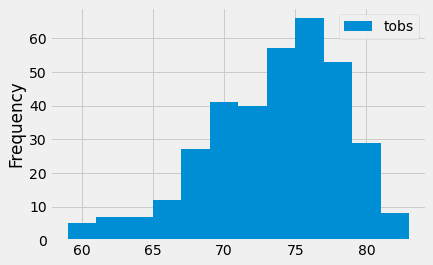

In [43]:
df.plot.hist(bins=12)


In [44]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

Looking at this plot, we can infer that a vast majority of the observations were over 67 degrees. If you count up the bins to the right of 67 degrees, you will get about 325 days where it was over 67 degrees when the temperature was observed.

***

#### `SKILL DRILL`
Adjust the number of bins in the plot to 5, and then adjust the number to 20. Take note of any differences in the plot caused by changing the number of bins.


<AxesSubplot:ylabel='Frequency'>

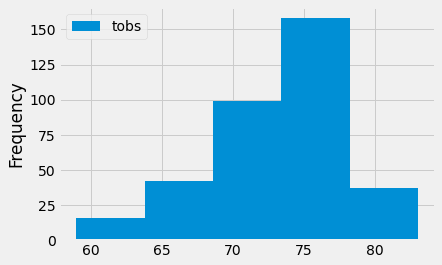

In [45]:
df.plot.hist(bins=5)


<AxesSubplot:ylabel='Frequency'>

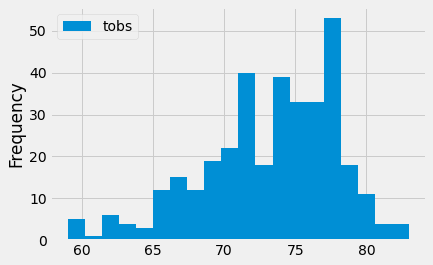

In [46]:
df.plot.hist(bins=20)


**Any differences in the plot caused by changing the number of bins?**

**5 Bins:** The small number of bins could over-simplify any trends

**20 Bins:** Would need to look at the data more in depth to understand the various dips in data.

***
Our work with the precipitation and station analysis is complete, so let's share our findings!
***

# 9.4.1 - Incorporate Flask into Data Analysis

You're now going to add a new tool to your data analysis toolbelt: Flask. *Watch the video.*


**Flask** allows you to create Python applications and then share the results of those applications with others via a webpage, making it a powerful tool for data analysis and visualization.

```
NOTE
Flask is also helpful when it comes to the job search. You can share your work in a web interface which is simple and effective, rather than viewing code on GitHub. Many employers will want to see your code, but more importantly, they want to see what it can do.
```

Your audience is a key factor when it comes to data visualization. There may be people in your audience who are not interested in the code itself, but rather what the code can do. Flask makes it possible to summarize the key ideas of your code in a way that allows people who don't have as much coding experience to understand the results of your code. We'll create a Flask application that will allow us to share our findings in an easy-to-interpret way.

Let's get started by connecting our database so that we can set up our Flask application. We'll also create a new Python file for the application.
***


# 9.4.2 - Building Flask Routes


Routes are a core Flask concept. They can be tricky to build (we'll get into that in a moment) but conceptually they are straightforward. In fact, you use routes whenever you google something, for example. If you search for "surfing," you get a number of different categories of pages offered to you: images, maps, news, videos, and more.


These are all different routes, or different pathways that a search can take. When we build our webpage for W. Avy, we'll need to make sure we have the correct routes, so that when investors click on the URL they can clearly navigate to the analysis they want to see.

We're going to create five routes for our investors: Welcome, Precipitation, Stations, Monthly Temperature, and Statistics. But first things first: let's install Flask.
***

# 9.4.3 - Set Up Flask and Create a Route

We need to set up Flask and then get started on creating our first Flask route. When creating a Flask application, we'll need to do a few things first. Here's our course of action:

1. Install Flask.
2. Create a new Python file.
3. Import the Flask dependency.
4. Create a new Flask app instance.
5. Create Flask routes.
6. Run a Flask app.

## Install Flask
You can install Flask by running the following in the command line:

`pip install flask`

If you already have Flask installed, the output of your code will show that you have already installed many of the components, if not all of them. Running this command will ensure that you have the most up-to-date version of Flask.

We need to ensure that we have the right environment in order for Flask to run properly. To do this, we will need to make a change in VS Code. We just need to select the PythonData environment we created in previous modules. To do this, click on "Select Python Interpreter," then select the PythonData environment.

#### `IMPORTANT`
Some users may need an additional package installed for this section. In your terminal, run the following code: `pip install psycopg2-binary` to add it to your coding environment.



***
### From here to next notes
This is a new py file
***


In [47]:
# pip install flask


In [48]:
# pip install psycopg2-binary
# 

## Create a New Python File and Import the Flask Dependency

Create a new Python file called `app.py`. You should create this file in VS Code.

Once the Python file is created, we can import the dependency we need. This dependency will enable your code to access all that Flask has to offer.

To import the Flask dependency, add the following to your code:

`from flask import Flask`
***


In [49]:
# from flask import Flask


## Create a New Flask App Instance

We're now ready to create a new Flask app instance. "Instance" is a general term in programming to refer to a singular version of something. Add the following to your code to create a new Flask instance called app:

`app = Flask(__name__)`

#### `IMPORTANT`
You probably noticed the `__name__` variable inside of the Flask() function. Let's pause for a second and identify what's going on here.

This `__name__` variable denotes the name of the current function. You can use the `__name__` variable to determine if your code is being run from the command line or if it has been imported into another piece of code. Variables with underscores before and after them are called **magic methods** in Python.

For more information, see this article on [magic methods](https://www.geeksforgeeks.org/dunder-magic-methods-python/).
***


In [50]:
# app = Flask(__name__)


## Create Flask Routes

Our Flask app has been created—let's create our first route!

First, we need to define the starting point, also known as the **root**. To do this, we'll use the function `@app.route('/')`. Add this to your code now.

`@app.route('/')`

***
#### `NOTE`
Notice the forward slash inside of the `app.route`? This denotes that we want to put our data at the root of our routes. The forward slash is commonly known as the highest level of hierarchy in any computer system.
***

Next, create a function called `hello_world()`. Whenever you make a route in Flask, you put the code you want in that specific route below `@app.route()`. Here's what it will look like:

```
@app.route('/')
def hello_world():
    return 'Hello world'
```

Great job! You have just created your first Flask route! Now that we have some code, let's keep running.

***


In [51]:
# @app.route('/')
# def hello_world():
#     return 'Hello world'


## Run a Flask App

The process of running a Flask app is a bit different from how we've run Python files. To run the app, we're first going to need to use the command line to navigate to the folder where we've saved our code. You should save this code in the same folder you've used in the rest of this module.

Once you've ensured that your code is saved in the proper directory, then run the following command if you are on a Mac. This command sets the FLASK_APP environment variable to the name of our Flask file, app.py.

#### `NOTE`
Environment variables are essentially dynamic variables in your computer. They are used to modify the way a certain aspect of the computer operates. For our `FLASK_APP` environment variable, we want to modify the path that will run our app.py file so that we can run our file.

`export FLASK_APP=app.py`

There won't be any output when you run this command, so don't worry if you don't see anything.

~If you are on a Windows computer, you will need to do the same thing, but in a slightly different way. Start by opening up Anaconda Powershell. Once you've done that, enter this command.~

~set FLASK_APP=app.py~

Now let's run our Flask app. To do this, type the following command in your command line and press Enter:~~

flask run
When you run this command, you'll notice a line that says "Running on" followed by an address. This should be your localhost address and a port number.

IMPORTANT
A port number is essentially the endpoint of a given program or service. Any Flask application you create can have whatever port number you would like, but the most common is 5000.

Copy and paste your localhost address into your web browser. Generally, a localhost will look something like this, for context.

localhost:5000
This is what you should see:

In [52]:
# export FLASK_APP=app.py


***
### Tnis is the end of the py file
***


In [53]:
# reflect an existing database into a new model

# reflect the tables


In [54]:
# We can view all of the classes that automap found


In [55]:
# Save references to each table


In [56]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [58]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [59]:
# How many stations are available in this dataset?


In [60]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [61]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [62]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [63]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge